# 19장 세상에 없는 얼굴 GAN, 오토인코더

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch19-colab.ipynb)

## 3. 적대적 신경망 실행하기

### 실습: GAN 모델 만들기

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

# 예제 파일에서 data 폴더 아래에 이미지가 저장될 gan_images 폴더가 함께 제공됩니다.
# 만약 이미지가 저장될 폴더가 없다면 아래 코드의 주석을 해제해 gan_images 폴더를 만듭니다.
# import os
# if not os.path.exists("./data/gan_images"):
#    os.makedirs("./data/gan_images")

# 생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# 판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False # 판별자의 변경된 가중치는 생성자의 가중치를 업데이트하는데 활용된다
# 그리고 판별자 자신이 학습되진 않는다 discriminator.trainable = False

# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


1/1 [==============================] - 0s 243ms/step
epoch:0  d_loss:0.6567  g_loss:0.6294
1/1 [==============================] - 0s 20ms/step
epoch:1  d_loss:0.3879  g_loss:0.1898
1/1 [==============================] - 0s 15ms/step
epoch:2  d_loss:0.5807  g_loss:0.0356
1/1 [==============================] - 0s 16ms/step
epoch:3  d_loss:0.8711  g_loss:0.0329
1/1 [==============================] - 0s 19ms/step
epoch:4  d_loss:0.8745  g_loss:0.1026
1/1 [==============================] - 0s 17ms/step
epoch:5  d_loss:0.6155  g_loss:0.3586
1/1 [==============================] - 0s 17ms/step
epoch:6  d_loss:0.4825  g_loss:0.7422
1/1 [==============================] - 0s 16ms/step
epoch:7  d_loss:0.4880  g_loss:1.0397
1/1 [==============================] - 0s 19ms/step
epoch:8  d_loss:0.4602  g_loss:1.1815
1/1 [==============================] - 0s 15ms/step
epoch:9  d_loss:0.4503  g_loss:1.1890
1/1 [==============================] - 0s 22ms/step
epoch:10  d_loss:0.4143  g_loss:1.0633
1/1 [===

epoch:89  d_loss:0.5265  g_loss:2.8714
1/1 [==============================] - 0s 15ms/step
epoch:90  d_loss:0.3890  g_loss:1.8340
1/1 [==============================] - 0s 15ms/step
epoch:91  d_loss:0.3822  g_loss:1.5749
1/1 [==============================] - 0s 15ms/step
epoch:92  d_loss:0.4276  g_loss:1.4854
1/1 [==============================] - 0s 15ms/step
epoch:93  d_loss:0.3171  g_loss:1.8061
1/1 [==============================] - 0s 17ms/step
epoch:94  d_loss:0.3210  g_loss:2.1983
1/1 [==============================] - 0s 15ms/step
epoch:95  d_loss:0.3385  g_loss:1.9725
1/1 [==============================] - 0s 16ms/step
epoch:96  d_loss:0.6415  g_loss:2.4769
1/1 [==============================] - 0s 16ms/step
epoch:97  d_loss:0.8585  g_loss:1.9253
1/1 [==============================] - 0s 15ms/step
epoch:98  d_loss:0.9629  g_loss:1.5018
1/1 [==============================] - 0s 15ms/step
epoch:99  d_loss:0.9652  g_loss:1.1365
1/1 [==============================] - 0s 15ms/step

1/1 [==============================] - 0s 16ms/step
epoch:179  d_loss:0.4480  g_loss:1.2604
1/1 [==============================] - 0s 14ms/step
epoch:180  d_loss:0.4863  g_loss:1.5219
1/1 [==============================] - 0s 18ms/step
epoch:181  d_loss:0.3602  g_loss:1.7987
1/1 [==============================] - 0s 16ms/step
epoch:182  d_loss:0.3968  g_loss:1.8356
1/1 [==============================] - 0s 16ms/step
epoch:183  d_loss:0.5331  g_loss:1.9705
1/1 [==============================] - 0s 17ms/step
epoch:184  d_loss:0.5604  g_loss:1.7496
1/1 [==============================] - 0s 15ms/step
epoch:185  d_loss:0.4403  g_loss:1.5103
1/1 [==============================] - 0s 16ms/step
epoch:186  d_loss:0.3327  g_loss:2.3859
1/1 [==============================] - 0s 16ms/step
epoch:187  d_loss:0.4839  g_loss:1.7721
1/1 [==============================] - 0s 15ms/step
epoch:188  d_loss:0.3352  g_loss:1.5660
1/1 [==============================] - 0s 16ms/step
epoch:189  d_loss:0.3414  g_

1/1 [==============================] - 0s 17ms/step
epoch:267  d_loss:0.3691  g_loss:2.3925
1/1 [==============================] - 0s 16ms/step
epoch:268  d_loss:0.3251  g_loss:3.5530
1/1 [==============================] - 0s 17ms/step
epoch:269  d_loss:0.3161  g_loss:3.2942
1/1 [==============================] - 0s 16ms/step
epoch:270  d_loss:0.2363  g_loss:3.1771
1/1 [==============================] - 0s 16ms/step
epoch:271  d_loss:0.3124  g_loss:2.9369
1/1 [==============================] - 0s 15ms/step
epoch:272  d_loss:0.2954  g_loss:2.7895
1/1 [==============================] - 0s 16ms/step
epoch:273  d_loss:0.2857  g_loss:2.6868
1/1 [==============================] - 0s 15ms/step
epoch:274  d_loss:0.4584  g_loss:2.6489
1/1 [==============================] - 0s 15ms/step
epoch:275  d_loss:0.3590  g_loss:2.7300
1/1 [==============================] - 0s 15ms/step
epoch:276  d_loss:0.3342  g_loss:2.4238
1/1 [==============================] - 0s 16ms/step
epoch:277  d_loss:0.4633  g_

1/1 [==============================] - 0s 16ms/step
epoch:356  d_loss:0.4196  g_loss:2.2349
1/1 [==============================] - 0s 17ms/step
epoch:357  d_loss:0.3655  g_loss:2.2507
1/1 [==============================] - 0s 16ms/step
epoch:358  d_loss:0.4481  g_loss:2.2952
1/1 [==============================] - 0s 17ms/step
epoch:359  d_loss:0.4749  g_loss:2.1651
1/1 [==============================] - 0s 16ms/step
epoch:360  d_loss:0.3183  g_loss:2.0038
1/1 [==============================] - 0s 16ms/step
epoch:361  d_loss:0.3263  g_loss:2.1933
1/1 [==============================] - 0s 15ms/step
epoch:362  d_loss:0.2484  g_loss:2.8119
1/1 [==============================] - 0s 22ms/step
epoch:363  d_loss:0.3683  g_loss:3.0051
1/1 [==============================] - 0s 16ms/step
epoch:364  d_loss:0.3433  g_loss:2.9535
1/1 [==============================] - 0s 15ms/step
epoch:365  d_loss:0.3411  g_loss:2.4501
1/1 [==============================] - 0s 15ms/step
epoch:366  d_loss:0.3355  g_

1/1 [==============================] - 0s 16ms/step
epoch:444  d_loss:0.2080  g_loss:2.5820
1/1 [==============================] - 0s 16ms/step
epoch:445  d_loss:0.2290  g_loss:2.4341
1/1 [==============================] - 0s 16ms/step
epoch:446  d_loss:0.2781  g_loss:2.3601
1/1 [==============================] - 0s 17ms/step
epoch:447  d_loss:0.3301  g_loss:2.1400
1/1 [==============================] - 0s 18ms/step
epoch:448  d_loss:0.2210  g_loss:2.2825
1/1 [==============================] - 0s 16ms/step
epoch:449  d_loss:0.2475  g_loss:3.1188
1/1 [==============================] - 0s 17ms/step
epoch:450  d_loss:0.2556  g_loss:2.5548
1/1 [==============================] - 0s 17ms/step
epoch:451  d_loss:0.3592  g_loss:2.4295
1/1 [==============================] - 0s 16ms/step
epoch:452  d_loss:0.2440  g_loss:2.7600
1/1 [==============================] - 0s 17ms/step
epoch:453  d_loss:0.2821  g_loss:2.4830
1/1 [==============================] - 0s 17ms/step
epoch:454  d_loss:0.2773  g_

1/1 [==============================] - 0s 15ms/step
epoch:533  d_loss:0.0852  g_loss:3.3006
1/1 [==============================] - 0s 16ms/step
epoch:534  d_loss:0.1318  g_loss:3.6556
1/1 [==============================] - 0s 15ms/step
epoch:535  d_loss:0.2103  g_loss:3.6400
1/1 [==============================] - 0s 14ms/step
epoch:536  d_loss:0.1782  g_loss:2.7822
1/1 [==============================] - 0s 16ms/step
epoch:537  d_loss:0.2847  g_loss:2.5827
1/1 [==============================] - 0s 15ms/step
epoch:538  d_loss:0.1811  g_loss:2.5345
1/1 [==============================] - 0s 15ms/step
epoch:539  d_loss:0.2397  g_loss:2.7248
1/1 [==============================] - 0s 15ms/step
epoch:540  d_loss:0.3157  g_loss:2.7524
1/1 [==============================] - 0s 15ms/step
epoch:541  d_loss:0.2373  g_loss:2.8312
1/1 [==============================] - 0s 16ms/step
epoch:542  d_loss:0.2069  g_loss:3.0737
1/1 [==============================] - 0s 15ms/step
epoch:543  d_loss:0.1726  g_

1/1 [==============================] - 0s 16ms/step
epoch:621  d_loss:0.4691  g_loss:1.6737
1/1 [==============================] - 0s 16ms/step
epoch:622  d_loss:0.3040  g_loss:2.0228
1/1 [==============================] - 0s 17ms/step
epoch:623  d_loss:0.1974  g_loss:2.4854
1/1 [==============================] - 0s 20ms/step
epoch:624  d_loss:0.2111  g_loss:2.6844
1/1 [==============================] - 0s 16ms/step
epoch:625  d_loss:0.2222  g_loss:2.2030
1/1 [==============================] - 0s 17ms/step
epoch:626  d_loss:0.1963  g_loss:1.8160
1/1 [==============================] - 0s 15ms/step
epoch:627  d_loss:0.2905  g_loss:1.5666
1/1 [==============================] - 0s 16ms/step
epoch:628  d_loss:0.2183  g_loss:1.7065
1/1 [==============================] - 0s 15ms/step
epoch:629  d_loss:0.2945  g_loss:1.9307
1/1 [==============================] - 0s 16ms/step
epoch:630  d_loss:0.2664  g_loss:1.7718
1/1 [==============================] - 0s 15ms/step
epoch:631  d_loss:0.2050  g_

1/1 [==============================] - 0s 15ms/step
epoch:710  d_loss:0.1977  g_loss:2.5228
1/1 [==============================] - 0s 15ms/step
epoch:711  d_loss:0.2882  g_loss:2.4209
1/1 [==============================] - 0s 16ms/step
epoch:712  d_loss:0.3366  g_loss:2.1924
1/1 [==============================] - 0s 15ms/step
epoch:713  d_loss:0.7268  g_loss:1.7596
1/1 [==============================] - 0s 15ms/step
epoch:714  d_loss:0.6993  g_loss:1.3263
1/1 [==============================] - 0s 16ms/step
epoch:715  d_loss:0.5557  g_loss:1.4982
1/1 [==============================] - 0s 15ms/step
epoch:716  d_loss:0.6160  g_loss:1.9170
1/1 [==============================] - 0s 15ms/step
epoch:717  d_loss:0.6585  g_loss:2.0450
1/1 [==============================] - 0s 16ms/step
epoch:718  d_loss:0.5866  g_loss:2.1384
1/1 [==============================] - 0s 16ms/step
epoch:719  d_loss:0.6973  g_loss:1.6330
1/1 [==============================] - 0s 18ms/step
epoch:720  d_loss:0.5457  g_

1/1 [==============================] - 0s 16ms/step
epoch:799  d_loss:0.4917  g_loss:1.4736
1/1 [==============================] - 0s 16ms/step
epoch:800  d_loss:0.4143  g_loss:1.3295
1/1 [==============================] - 0s 16ms/step
epoch:801  d_loss:0.4682  g_loss:1.2408
1/1 [==============================] - 0s 16ms/step
epoch:802  d_loss:0.4240  g_loss:1.5195
1/1 [==============================] - 0s 16ms/step
epoch:803  d_loss:0.4980  g_loss:1.5836
1/1 [==============================] - 0s 16ms/step
epoch:804  d_loss:0.5884  g_loss:1.6109
1/1 [==============================] - 0s 16ms/step
epoch:805  d_loss:0.6726  g_loss:1.2907
1/1 [==============================] - 0s 18ms/step
epoch:806  d_loss:0.3998  g_loss:1.2429
1/1 [==============================] - 0s 15ms/step
epoch:807  d_loss:0.4025  g_loss:1.4026
1/1 [==============================] - 0s 16ms/step
epoch:808  d_loss:0.4954  g_loss:1.3521
1/1 [==============================] - 0s 15ms/step
epoch:809  d_loss:0.3434  g_

1/1 [==============================] - 0s 16ms/step
epoch:887  d_loss:0.4430  g_loss:2.4630
1/1 [==============================] - 0s 16ms/step
epoch:888  d_loss:0.5587  g_loss:1.5904
1/1 [==============================] - 0s 16ms/step
epoch:889  d_loss:0.4876  g_loss:2.1929
1/1 [==============================] - 0s 16ms/step
epoch:890  d_loss:0.5150  g_loss:2.2997
1/1 [==============================] - 0s 16ms/step
epoch:891  d_loss:0.3282  g_loss:3.1243
1/1 [==============================] - 0s 16ms/step
epoch:892  d_loss:0.5180  g_loss:3.2682
1/1 [==============================] - 0s 16ms/step
epoch:893  d_loss:0.6336  g_loss:1.9043
1/1 [==============================] - 0s 16ms/step
epoch:894  d_loss:0.3067  g_loss:2.3189
1/1 [==============================] - 0s 15ms/step
epoch:895  d_loss:0.3180  g_loss:2.0878
1/1 [==============================] - 0s 16ms/step
epoch:896  d_loss:0.3587  g_loss:2.3909
1/1 [==============================] - 0s 18ms/step
epoch:897  d_loss:0.2000  g_

1/1 [==============================] - 0s 16ms/step
epoch:976  d_loss:0.4972  g_loss:1.9186
1/1 [==============================] - 0s 16ms/step
epoch:977  d_loss:0.4452  g_loss:1.7824
1/1 [==============================] - 0s 17ms/step
epoch:978  d_loss:0.4418  g_loss:1.8767
1/1 [==============================] - 0s 15ms/step
epoch:979  d_loss:0.4178  g_loss:2.2340
1/1 [==============================] - 0s 15ms/step
epoch:980  d_loss:0.4862  g_loss:2.3880
1/1 [==============================] - 0s 16ms/step
epoch:981  d_loss:0.4434  g_loss:1.8993
1/1 [==============================] - 0s 15ms/step
epoch:982  d_loss:0.4344  g_loss:2.1768
1/1 [==============================] - 0s 15ms/step
epoch:983  d_loss:0.4570  g_loss:1.5286
1/1 [==============================] - 0s 16ms/step
epoch:984  d_loss:0.4564  g_loss:1.9513
1/1 [==============================] - 0s 17ms/step
epoch:985  d_loss:0.3450  g_loss:2.1063
1/1 [==============================] - 0s 18ms/step
epoch:986  d_loss:0.3087  g_

1/1 [==============================] - 0s 15ms/step
epoch:1064  d_loss:0.4164  g_loss:1.1601
1/1 [==============================] - 0s 15ms/step
epoch:1065  d_loss:0.5568  g_loss:1.2992
1/1 [==============================] - 0s 16ms/step
epoch:1066  d_loss:0.4249  g_loss:1.3397
1/1 [==============================] - 0s 17ms/step
epoch:1067  d_loss:0.3919  g_loss:1.7743
1/1 [==============================] - 0s 17ms/step
epoch:1068  d_loss:0.3727  g_loss:2.1248
1/1 [==============================] - 0s 15ms/step
epoch:1069  d_loss:0.4413  g_loss:2.0258
1/1 [==============================] - 0s 16ms/step
epoch:1070  d_loss:0.6861  g_loss:1.7551
1/1 [==============================] - 0s 15ms/step
epoch:1071  d_loss:0.6012  g_loss:1.6692
1/1 [==============================] - 0s 17ms/step
epoch:1072  d_loss:0.4608  g_loss:1.4802
1/1 [==============================] - 0s 15ms/step
epoch:1073  d_loss:0.3152  g_loss:1.8991
1/1 [==============================] - 0s 15ms/step
epoch:1074  d_loss

1/1 [==============================] - 0s 15ms/step
epoch:1152  d_loss:0.4749  g_loss:1.3811
1/1 [==============================] - 0s 15ms/step
epoch:1153  d_loss:0.4565  g_loss:1.6760
1/1 [==============================] - 0s 16ms/step
epoch:1154  d_loss:0.6139  g_loss:2.0870
1/1 [==============================] - 0s 15ms/step
epoch:1155  d_loss:0.4156  g_loss:2.3029
1/1 [==============================] - 0s 17ms/step
epoch:1156  d_loss:0.3604  g_loss:2.2932
1/1 [==============================] - 0s 15ms/step
epoch:1157  d_loss:0.3587  g_loss:2.1383
1/1 [==============================] - 0s 15ms/step
epoch:1158  d_loss:0.4327  g_loss:2.0209
1/1 [==============================] - 0s 15ms/step
epoch:1159  d_loss:0.4210  g_loss:2.1076
1/1 [==============================] - 0s 15ms/step
epoch:1160  d_loss:0.4527  g_loss:1.6590
1/1 [==============================] - 0s 14ms/step
epoch:1161  d_loss:0.3092  g_loss:2.2296
1/1 [==============================] - 0s 16ms/step
epoch:1162  d_loss

epoch:1239  d_loss:0.3618  g_loss:1.7747
1/1 [==============================] - 0s 15ms/step
epoch:1240  d_loss:0.6233  g_loss:1.7199
1/1 [==============================] - 0s 17ms/step
epoch:1241  d_loss:0.4623  g_loss:2.2544
1/1 [==============================] - 0s 16ms/step
epoch:1242  d_loss:0.5526  g_loss:2.0727
1/1 [==============================] - 0s 15ms/step
epoch:1243  d_loss:0.6516  g_loss:1.7691
1/1 [==============================] - 0s 15ms/step
epoch:1244  d_loss:0.5330  g_loss:1.6492
1/1 [==============================] - 0s 15ms/step
epoch:1245  d_loss:0.5811  g_loss:1.3217
1/1 [==============================] - 0s 15ms/step
epoch:1246  d_loss:0.5417  g_loss:1.3507
1/1 [==============================] - 0s 14ms/step
epoch:1247  d_loss:0.4815  g_loss:1.7991
1/1 [==============================] - 0s 15ms/step
epoch:1248  d_loss:0.6793  g_loss:2.0423
1/1 [==============================] - 0s 15ms/step
epoch:1249  d_loss:0.6869  g_loss:1.7624
1/1 [========================

1/1 [==============================] - 0s 15ms/step
epoch:1328  d_loss:0.6857  g_loss:1.4114
1/1 [==============================] - 0s 16ms/step
epoch:1329  d_loss:0.6003  g_loss:1.4070
1/1 [==============================] - 0s 15ms/step
epoch:1330  d_loss:0.5767  g_loss:1.7120
1/1 [==============================] - 0s 15ms/step
epoch:1331  d_loss:0.6116  g_loss:1.5002
1/1 [==============================] - 0s 15ms/step
epoch:1332  d_loss:0.4234  g_loss:1.8491
1/1 [==============================] - 0s 16ms/step
epoch:1333  d_loss:0.7665  g_loss:1.5341
1/1 [==============================] - 0s 16ms/step
epoch:1334  d_loss:0.5730  g_loss:1.6075
1/1 [==============================] - 0s 14ms/step
epoch:1335  d_loss:0.6292  g_loss:1.3383
1/1 [==============================] - 0s 15ms/step
epoch:1336  d_loss:0.4562  g_loss:1.5285
1/1 [==============================] - 0s 15ms/step
epoch:1337  d_loss:0.4919  g_loss:1.6597
1/1 [==============================] - 0s 16ms/step
epoch:1338  d_loss

epoch:1415  d_loss:0.3626  g_loss:2.2535
1/1 [==============================] - 0s 15ms/step
epoch:1416  d_loss:0.4876  g_loss:1.9874
1/1 [==============================] - 0s 15ms/step
epoch:1417  d_loss:0.3854  g_loss:2.0550
1/1 [==============================] - 0s 14ms/step
epoch:1418  d_loss:0.4376  g_loss:1.6939
1/1 [==============================] - 0s 15ms/step
epoch:1419  d_loss:0.4471  g_loss:1.3337
1/1 [==============================] - 0s 16ms/step
epoch:1420  d_loss:0.3579  g_loss:1.8637
1/1 [==============================] - 0s 15ms/step
epoch:1421  d_loss:0.3394  g_loss:2.1699
1/1 [==============================] - 0s 15ms/step
epoch:1422  d_loss:0.2690  g_loss:2.3317
1/1 [==============================] - 0s 15ms/step
epoch:1423  d_loss:0.3440  g_loss:1.9793
1/1 [==============================] - 0s 16ms/step
epoch:1424  d_loss:0.4721  g_loss:1.9646
1/1 [==============================] - 0s 16ms/step
epoch:1425  d_loss:0.5894  g_loss:1.6733
1/1 [========================

1/1 [==============================] - 0s 15ms/step
epoch:1504  d_loss:0.5580  g_loss:1.8787
1/1 [==============================] - 0s 16ms/step
epoch:1505  d_loss:0.5525  g_loss:1.7756
1/1 [==============================] - 0s 15ms/step
epoch:1506  d_loss:0.5614  g_loss:1.5434
1/1 [==============================] - 0s 16ms/step
epoch:1507  d_loss:0.4078  g_loss:1.5102
1/1 [==============================] - 0s 15ms/step
epoch:1508  d_loss:0.4830  g_loss:1.7993
1/1 [==============================] - 0s 16ms/step
epoch:1509  d_loss:0.3085  g_loss:1.9263
1/1 [==============================] - 0s 15ms/step
epoch:1510  d_loss:0.4203  g_loss:2.2053
1/1 [==============================] - 0s 16ms/step
epoch:1511  d_loss:0.4582  g_loss:2.0603
1/1 [==============================] - 0s 15ms/step
epoch:1512  d_loss:0.4045  g_loss:1.9149
1/1 [==============================] - 0s 25ms/step
epoch:1513  d_loss:0.4307  g_loss:1.5856
1/1 [==============================] - 0s 15ms/step
epoch:1514  d_loss

1/1 [==============================] - 0s 15ms/step
epoch:1592  d_loss:0.5191  g_loss:1.6075
1/1 [==============================] - 0s 15ms/step
epoch:1593  d_loss:0.3965  g_loss:1.5591
1/1 [==============================] - 0s 17ms/step
epoch:1594  d_loss:0.5820  g_loss:1.7637
1/1 [==============================] - 0s 15ms/step
epoch:1595  d_loss:0.3411  g_loss:1.9809
1/1 [==============================] - 0s 16ms/step
epoch:1596  d_loss:0.6202  g_loss:2.1169
1/1 [==============================] - 0s 14ms/step
epoch:1597  d_loss:0.6374  g_loss:1.8684
1/1 [==============================] - 0s 16ms/step
epoch:1598  d_loss:0.4804  g_loss:1.3700
1/1 [==============================] - 0s 15ms/step
epoch:1599  d_loss:0.4306  g_loss:1.5576
1/1 [==============================] - 0s 15ms/step
epoch:1600  d_loss:0.4108  g_loss:1.3980
1/1 [==============================] - 0s 15ms/step
epoch:1601  d_loss:0.5802  g_loss:1.8847
1/1 [==============================] - 0s 16ms/step
epoch:1602  d_loss

epoch:1679  d_loss:0.3284  g_loss:1.9624
1/1 [==============================] - 0s 15ms/step
epoch:1680  d_loss:0.4916  g_loss:1.8049
1/1 [==============================] - 0s 15ms/step
epoch:1681  d_loss:0.5322  g_loss:1.5914
1/1 [==============================] - 0s 15ms/step
epoch:1682  d_loss:0.4540  g_loss:1.9763
1/1 [==============================] - 0s 19ms/step
epoch:1683  d_loss:0.3548  g_loss:1.8984
1/1 [==============================] - 0s 16ms/step
epoch:1684  d_loss:0.4606  g_loss:1.7576
1/1 [==============================] - 0s 15ms/step
epoch:1685  d_loss:0.3683  g_loss:1.8709
1/1 [==============================] - 0s 20ms/step
epoch:1686  d_loss:0.3348  g_loss:2.2354
1/1 [==============================] - 0s 16ms/step
epoch:1687  d_loss:0.6435  g_loss:1.9308
1/1 [==============================] - 0s 15ms/step
epoch:1688  d_loss:0.4408  g_loss:1.5275
1/1 [==============================] - 0s 15ms/step
epoch:1689  d_loss:0.5870  g_loss:1.4067
1/1 [========================

1/1 [==============================] - 0s 15ms/step
epoch:1768  d_loss:0.5515  g_loss:1.6864
1/1 [==============================] - 0s 15ms/step
epoch:1769  d_loss:0.4731  g_loss:1.6714
1/1 [==============================] - 0s 15ms/step
epoch:1770  d_loss:0.4790  g_loss:1.5922
1/1 [==============================] - 0s 16ms/step
epoch:1771  d_loss:0.3762  g_loss:1.8134
1/1 [==============================] - 0s 14ms/step
epoch:1772  d_loss:0.5231  g_loss:1.6125
1/1 [==============================] - 0s 17ms/step
epoch:1773  d_loss:0.5899  g_loss:1.4578
1/1 [==============================] - 0s 16ms/step
epoch:1774  d_loss:0.4911  g_loss:1.8867
1/1 [==============================] - 0s 16ms/step
epoch:1775  d_loss:0.5480  g_loss:1.7867
1/1 [==============================] - 0s 16ms/step
epoch:1776  d_loss:0.4277  g_loss:1.7134
1/1 [==============================] - 0s 16ms/step
epoch:1777  d_loss:0.5344  g_loss:1.4199
1/1 [==============================] - 0s 16ms/step
epoch:1778  d_loss

epoch:1855  d_loss:0.5996  g_loss:1.9649
1/1 [==============================] - 0s 16ms/step
epoch:1856  d_loss:0.4534  g_loss:1.7889
1/1 [==============================] - 0s 16ms/step
epoch:1857  d_loss:0.3876  g_loss:1.7053
1/1 [==============================] - 0s 15ms/step
epoch:1858  d_loss:0.4524  g_loss:1.8900
1/1 [==============================] - 0s 16ms/step
epoch:1859  d_loss:0.4940  g_loss:1.5930
1/1 [==============================] - 0s 16ms/step
epoch:1860  d_loss:0.4557  g_loss:1.4752
1/1 [==============================] - 0s 15ms/step
epoch:1861  d_loss:0.7733  g_loss:1.0528
1/1 [==============================] - 0s 16ms/step
epoch:1862  d_loss:0.4664  g_loss:1.7641
1/1 [==============================] - 0s 16ms/step
epoch:1863  d_loss:0.5563  g_loss:1.5654
1/1 [==============================] - 0s 16ms/step
epoch:1864  d_loss:0.5437  g_loss:1.2204
1/1 [==============================] - 0s 15ms/step
epoch:1865  d_loss:0.5784  g_loss:1.3945
1/1 [========================

1/1 [==============================] - 0s 16ms/step
epoch:1944  d_loss:0.4725  g_loss:1.3972
1/1 [==============================] - 0s 19ms/step
epoch:1945  d_loss:0.3560  g_loss:1.6446
1/1 [==============================] - 0s 16ms/step
epoch:1946  d_loss:0.4306  g_loss:1.4955
1/1 [==============================] - 0s 15ms/step
epoch:1947  d_loss:0.4676  g_loss:1.5518
1/1 [==============================] - 0s 16ms/step
epoch:1948  d_loss:0.5193  g_loss:1.5634
1/1 [==============================] - 0s 16ms/step
epoch:1949  d_loss:0.3174  g_loss:1.7174
1/1 [==============================] - 0s 15ms/step
epoch:1950  d_loss:0.5169  g_loss:1.9600
1/1 [==============================] - 0s 15ms/step
epoch:1951  d_loss:0.5585  g_loss:1.3993
1/1 [==============================] - 0s 16ms/step
epoch:1952  d_loss:0.4311  g_loss:1.7062
1/1 [==============================] - 0s 15ms/step
epoch:1953  d_loss:0.4362  g_loss:1.6186
1/1 [==============================] - 0s 15ms/step
epoch:1954  d_loss

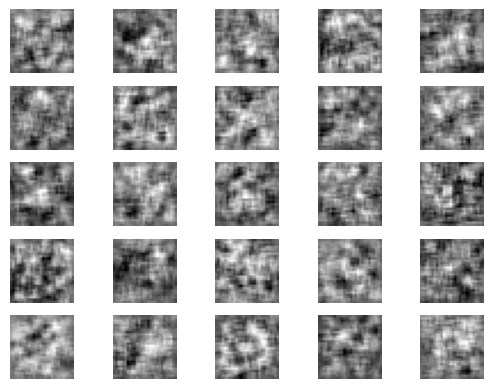

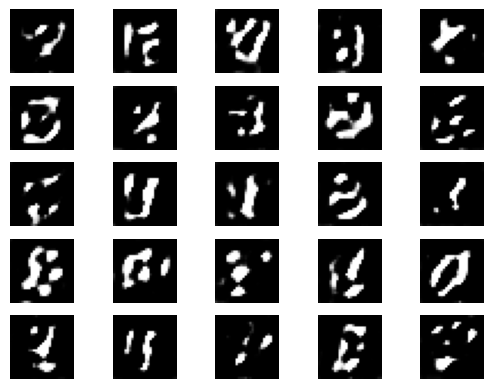

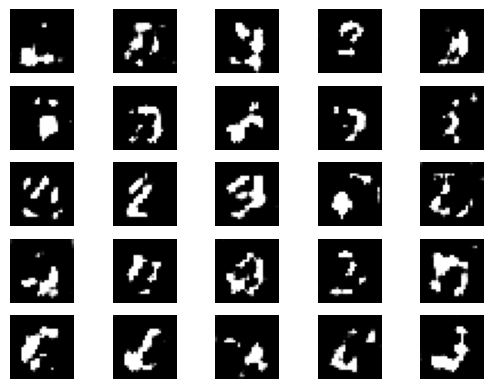

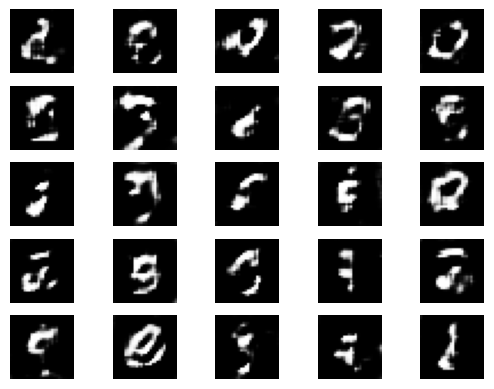

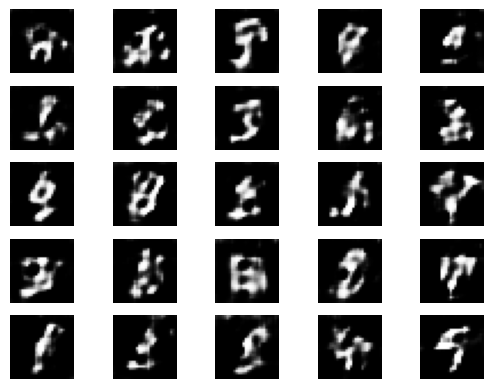

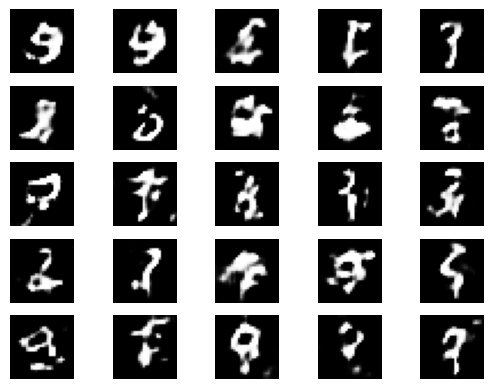

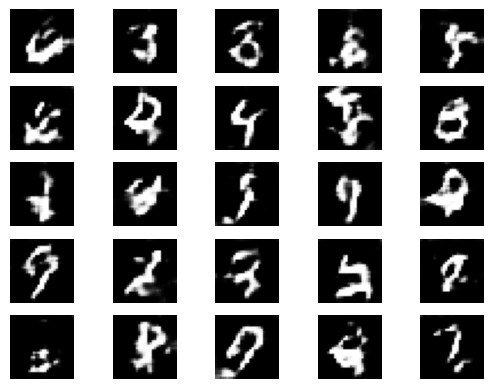

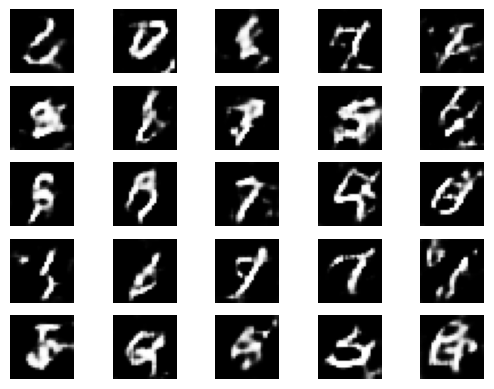

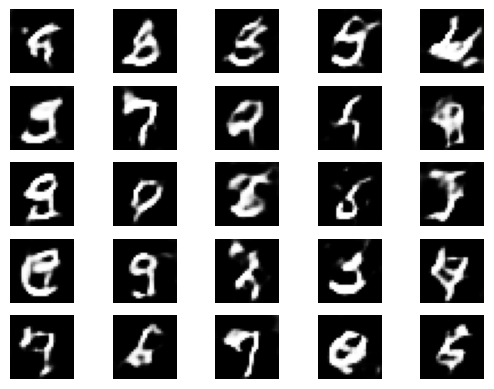

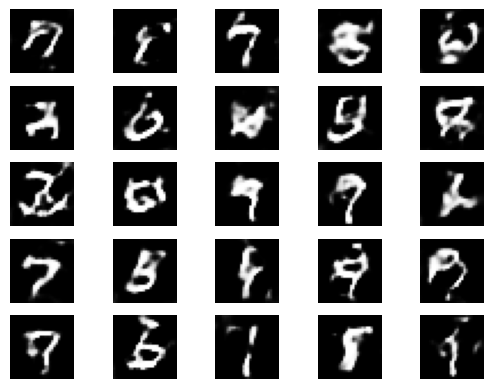

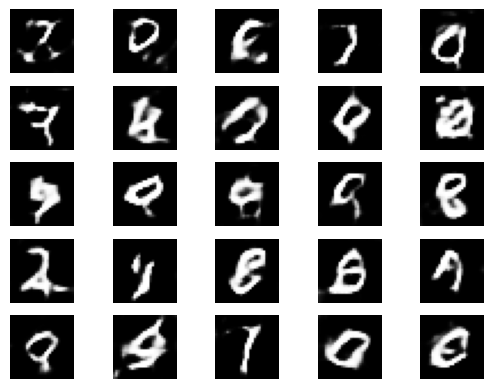

In [2]:
# 신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 불러옵니다.

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀 값은 0에서 255 사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # 판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스 코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("./data/gan_images/gan_mnist_%d.png" % i)

gan_train(2001, 32, 200)  # 2000번 반복되고, 배치 사이즈는 32,  200번마다 결과가 저장되게 하였습니다.

## 4. 이미지의 특징을 추출하는 오토인코더

### 실습: 오토인코더 실습하기

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분이 이어집니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 8)          

Epoch 1/50
469/469 [==============================] - 6s 11ms/step - loss: 0.2058 - val_loss: 0.1377
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1273 - val_loss: 0.1183
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1158 - val_loss: 0.1112
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1101 - val_loss: 0.1073
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1063 - val_loss: 0.1039
Epoch 6/50
469/469 [==============================] - 4s 10ms/step - loss: 0.1036 - val_loss: 0.1013
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1014 - val_loss: 0.0991
Epoch 8/50
469/469 [==============================] - 4s 10ms/step - loss: 0.0994 - val_loss: 0.0973
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0978 - val_loss: 0.0959
Epoch 10/50
469/469 [==============================] - 4s 10ms/step - loss: 0.0964 - val_loss: 0.

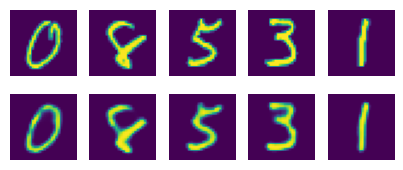

In [4]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()